In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [3]:
df = pd.read_csv("rop_clean.csv")

In [4]:
df.columns

Index(['review_rating', 'user_name', 'review_date', 'review_title',
       'review_text', 'num_helpful_reactions', 'num_total_reactions',
       'episode_number', 'season_number', 'review_score',
       'review_title_original', 'review_text_original',
       'review_title_len_no_token', 'review_text_len_no_token',
       'full_review_text', 'review_title_clean', 'review_text_clean',
       'full_review_text_clean', 'clean_review_title_num_tokens',
       'clean_review_text_num_tokens', 'clean_review_title_len',
       'clean_review_text_len', 'review_rating_categorical',
       'review_rating_5_scale', 'review_sentiment'],
      dtype='object')

### Analysis on Reviews and Reactions

In [5]:
df = pd.read_csv("rop_clean.csv")
reviews = df[["user_name", "num_total_reactions", "review_score", "review_rating", "review_title", "review_text", "episode_number", "review_rating_5_scale", "review_sentiment"]]
top_reactions = reviews.sort_values(["num_total_reactions", "review_score"], ascending=False).reset_index(drop=True)[:100]
top_review_rating = reviews[reviews["num_total_reactions"] > 1000].sort_values(["review_score", "num_total_reactions"], ascending=False).reset_index(drop=True)[:50]
bottom_review_rating = reviews[reviews["num_total_reactions"] > 1000].sort_values(["review_score", "num_total_reactions"], ascending=True).reset_index(drop=True)[:50]

In [80]:
top_reactions

,user_name,num_total_reactions,review_score,review_rating,review_title,review_text,episode_number,review_rating_5_scale,review_sentiment
0,Rasalgheti_20002,5237,26.79,7,surprisingly good,"a pleasant surprise, the cinematography is imp...",0,4,1
1,snowadian2,4909,30.23,4,welcome back to middle-earth... or maybe not ...,"season edit 4/10:the season finale was okay, s...",0,2,0
2,Backwards7102,4510,28.25,4,two episodes in and genuinely looking forward...,we all know liberties were taken with this ser...,0,2,0
3,saimariejohnson2,4244,25.47,10,immersive and glorious.,i was immediately drawn in! i loved the beginn...,0,5,1
4,tsbond-209-8505032,3971,30.85,9,pretty good start,was not bad at all a little slow to get going ...,0,5,1
...,...,...,...,...,...,...,...,...,...
95,ben_jarmin_430,872,38.42,2,"it just gets worse, someone deus ex machina t...",where on earth do i begin? why would you leave...,6,1,0
96,DragoonKain5,864,78.94,4,if you liked the last season of game of thron...,let's get the good stuff out of the way first....,0,2,0
97,brussetjulien3,858,76.57,1,"well, it's pretty...but that's where it ends","nice cinematography, but that's where i can en...",0,1,0
98,Mike_O_Dwyer4,853,17.94,5,an epic adventure back there again,i used read lotr every summer during my teens/...,0,3,0


In [81]:
print(top_reactions.review_rating.mean())
print(top_reactions.review_rating_5_scale.mean())
print(top_reactions.review_sentiment.mean())

7.34
3.84
0.77


In [82]:
top_review_rating

,user_name,num_total_reactions,review_score,review_rating,review_title,review_text,episode_number,review_rating_5_scale,review_sentiment
0,FreddyShoop6,1247,82.20,3,meh. special effects and visuals do not make ...,"two episodes in, and i find it utterly uncompe...",0,2,0
1,clawingthepsychosphere2,1229,80.47,2,you can't even hate this.,"this show feels nothing like lotr, neither the...",0,1,0
2,mluinstra5,1105,78.73,2,very disappointed after watching the first 2 ...,i will start by saying the visuals are excelle...,0,1,0
3,Couchkik202,1603,77.79,1,most expensive enya music video ever,"for all the expensive sets, cgi trees, ravishi...",0,1,0
4,minus52525,1198,76.96,1,lacks soul,i was floored with how boring the show is. it ...,0,1,0
5,cwqfck2,1261,76.69,1,"oh dear, no dear",how much did they spend on this ?to believe th...,0,1,0
6,murphy-776922,1024,76.37,1,i gave both episodes a go,pros: where to begin. well the cgi is good and...,0,1,0
7,twillbox3,3616,76.36,5,i expected much better after all the hype,ok so where to begin. i gave it a 2.5 stars or...,0,3,0
8,discerninguser7,1338,76.31,1,boring and not at all worth the wait,i am a big fan of lotr (both the book and the ...,0,1,0
9,mikeh-540444,2768,66.47,1,first season - disconnected bits & pieces wit...,"to be fair, like the late christopher lee, i r...",0,1,0


In [83]:
print(top_review_rating.review_rating.mean())
print(top_review_rating.review_rating_5_scale.mean())
print(top_review_rating.review_sentiment.mean())

6.88
3.66
0.74


In [84]:
bottom_review_rating

,user_name,num_total_reactions,review_score,review_rating,review_title,review_text,episode_number,review_rating_5_scale,review_sentiment
0,am3r1canpyro2,1078,9.28,10,a good start to a show that will hopefully be...,while there are many flaws in the first two ep...,0,5,1
1,michaelblatter2,1153,9.71,10,awesome and it's just the first episode,really awesome looking forward for more. the o...,0,5,1
2,julianeliasrehm2,1085,9.77,10,stunning,wow wow wow. it looks absolutely incredible. s...,0,5,1
3,charbelelchaerr2,1174,10.22,10,amazingly mesmerizing,these 2 episodes were worth waiting for three ...,0,5,1
4,haroonmajeed2,1324,10.35,10,mind blowing work,one of the best tv show of 2022. great start f...,0,5,1
5,davidrobson-703542,1093,10.61,10,spectacular and feels very tolkien.,epic visuals really help it along.the first ep...,0,5,1
6,scienceguyyyyy2,1240,10.65,10,better than got & hod,this series respects source material very well...,0,5,1
7,guineacowgal2,1016,11.12,10,middle earth is back,everything comes together wonderfully from ric...,0,5,1
8,moonspell-939402,1047,11.17,10,high fantasy epic,first conclusion: where house of the dragon mo...,0,5,1
9,imperialmattie2,1259,11.28,10,better than expected,it might not quite be peter jackson's lotr but...,0,5,1


In [39]:
df = df[["user_name", "num_total_reactions", "review_score", "review_rating", "review_title", "review_text", "episode_number"]]
df = df[:100].reset_index(drop=True)

In [40]:
df

,user_name,num_total_reactions,review_score,review_rating,review_title,review_text,episode_number
0,Rasalgheti_20002,5237,26.79,7,surprisingly good,"a pleasant surprise, the cinematography is imp...",0
1,snowadian2,4909,30.23,4,welcome back to middle-earth... or maybe not ...,"season edit 4/10:the season finale was okay, s...",0
2,Backwards7102,4510,28.25,4,two episodes in and genuinely looking forward...,we all know liberties were taken with this ser...,0
3,saimariejohnson2,4244,25.47,10,immersive and glorious.,i was immediately drawn in! i loved the beginn...,0
4,tsbond-209-8505032,3971,30.85,9,pretty good start,was not bad at all a little slow to get going ...,0
...,...,...,...,...,...,...,...
95,ben_jarmin_430,872,38.42,2,"it just gets worse, someone deus ex machina t...",where on earth do i begin? why would you leave...,6
96,DragoonKain5,864,78.94,4,if you liked the last season of game of thron...,let's get the good stuff out of the way first....,0
97,brussetjulien3,858,76.57,1,"well, it's pretty...but that's where it ends","nice cinematography, but that's where i can en...",0
98,Mike_O_Dwyer4,853,17.94,5,an epic adventure back there again,i used read lotr every summer during my teens/...,0


### Histogram of Ratings

In [6]:
def build_histogram_of_rating_scores(df: pd.DataFrame, season: int, episode: int, show: str, path: str, x: str="review_rating"):
    """Build and save a histogram specific to rating scores.

    Args:
        df (pd.DataFrame): _description_
        season (int): _description_
        episode (int): _description_
        show (str): _description_
        x (str, optional): _description_. Defaults to "review_rating".
        
    Returns:
        None
    """
    n_colors = df[x].nunique()  # Get number of colors for palette
    rg_palette = sns.color_palette("RdYlGn_r", n_colors=n_colors)
    rg_palette.reverse()  # reverse palette from red to green

    # Construct the cat plot
    g = sns.catplot(data=df, x=x, kind="count", palette=rg_palette, height=5, aspect=1.5, order=["abysmal", "bad", "average", "good", "amazing"])
    ax = g.facet_axis(0, 0)  # extract the matplotlib axes_subplot objects from the FacetGrid

    # Iterate through the axes containers to assign tooltips
    for c in ax.containers:
        values = [v.get_height() for v in c]
        values_sum = sum(values)
        labels = [f"{round((v / values_sum) * 100)}%" for v in values]  
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=10)

    # Handle x axis title
    if x == "review_rating":
        xlabel = "Original Review Rating Score"
        dtype = "Review Rating Original Scores"
    elif x == "review_rating_categorical":
        xlabel = "Review Rating Category"
        dtype = "Review Rating Categories"
    elif x == "review_rating_5_scale":
        xlabel = "Downscaled Review Rating Score"
        dtype = "Review Rating Downscaled Scores"
    plt.xlabel(xlabel, fontsize=10)
    
    # Handle y axis title
    plt.ylabel("Frequency", fontsize=10)

    # Handle plot title according to data
    if episode is None:
        title = f"({show}-S{season}) Histogram of All {dtype}"
    else:
        if episode == 0:
            title = f"({show}-S{season}) Histogram of Show {dtype}"
        else:
            title = f"({show}-S{season}:E{episode}) Histogram of {dtype}"
    plt.title(title, fontweight="bold", fontsize=14)
    
    # Save plot
    plt.save(path)

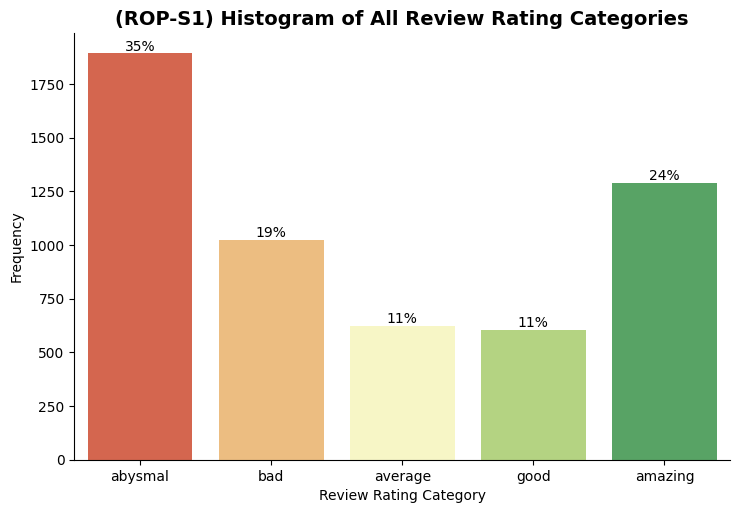

<Figure size 1000x1000 with 0 Axes>

In [104]:
build_histogram_of_rating_scores(df=df, season=1, episode=None, show="ROP", x="review_rating_categorical")

### Box Plots

151.0

/tmp/ipykernel_5528/1484665244.py:11: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=temp_df, x=x, y=y, color="k", size=0, ax=g.ax, palette=rg_palette)


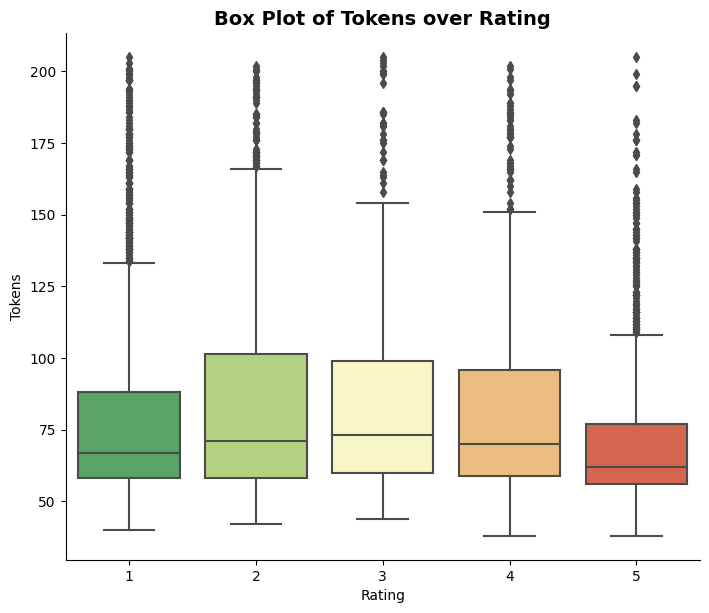

<Figure size 640x480 with 0 Axes>

In [13]:
def build_categorical_bot_plot(
    df: pd.DataFrame,
    x: str,
    y: str,
    path: str = None,
    xlabel: str = None,
    ylabel: str = None,
    display: bool = True,
    season: int = None,
    episode: int = None,
    show: str=None
) -> None:
    """Constructs a chart with a series of bar plots, with granularity by a dimension.

    Args:
        df (pd.DataFrame): source data-frame.
        x (str): x axis.
        y (str): y axis.
        path (str, optional): path where to save plot. Defaults to None.
        xlabel (str, optional): plot text label for x. Defaults to None.
        ylabel (str, optional): plot text label for y. Defaults to None.
        display (bool, optional): boolean to display plot or not. Defaults to True.

    Returns:
        None
    """
    # We filter in case of many outliers in a very long tail
    ylabel_95th = df[y].quantile(0.95)  # 95th percentile
    temp_df = df[df[y] < ylabel_95th]

    n_colors = df[x].nunique()  # Get number of colors for palette
    rg_palette = sns.color_palette("RdYlGn_r", n_colors=n_colors)

    # Combine a categorical plot with the stripplot function for boxes/violins/etc.
    g = sns.catplot(
        data=temp_df, x=x, y=y, kind="box", height=6, aspect=1.2, palette=rg_palette
    )
    sns.stripplot(
        data=temp_df, x=x, y=y, color="k", size=0, ax=g.ax, palette=rg_palette
    )


    # Handle plot text according to data
    if not all([xlabel, ylabel]):
        xlabel = x
        ylabel = y
    title = f"Box Plot of {ylabel} over {xlabel}"
    
    if all([show, season]):
        if (episode is None) or (episode == 0):
            title_root = f"({show}-S{season})"
        else:
            title_root = f"({show}-S{season}:E{episode})"
    elif show:
        title_root = f"({show})"
    else:
        title_root = ""

    plt.title(f"{title_root}{title}", fontsize=14)
    plt.ylabel(ylabel, fontsize=10)
    plt.xlabel(xlabel, fontsize=10)

    # Save plot
    if path:
        plt.save(path)

    # Optional show plot
    if display:
        plt.show()
    plt.clf()
    
build_categorical_bot_plot(df=df, x="review_rating_5_scale", y="clean_review_text_num_tokens", ylabel="Tokens", xlabel="Rating")
    

### Histograms of Review Score

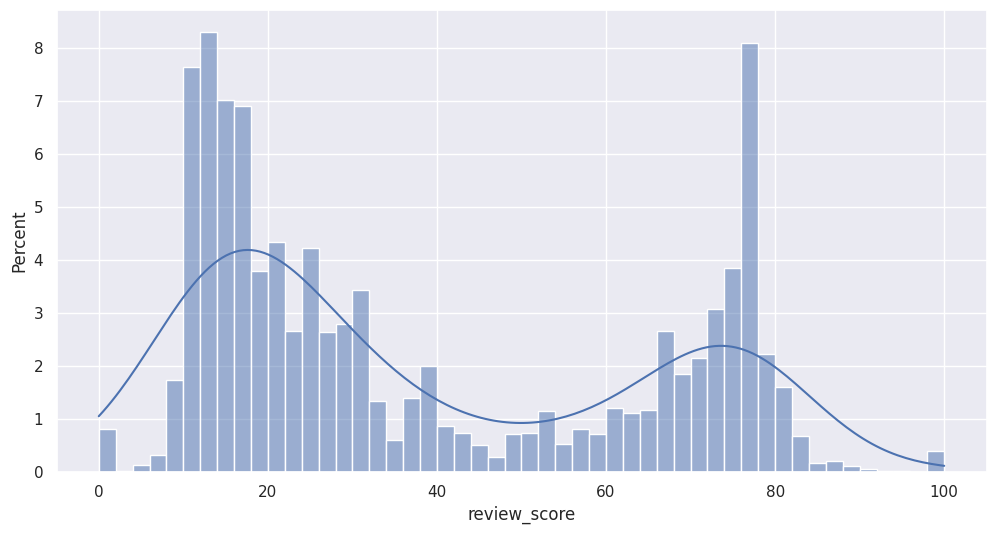

In [235]:
from re import X


def build_percent_histogram(
    df: pd.DataFrame,
    season: int,
    episode: int,
    show: str,
    path: str=None,
    x: str = "review_rating",
    weights: str=None,
    display: bool = True,
) -> None:
    sns.set(rc={'figure.figsize':(12, 6)})
    if weights:
        sns.histplot(data=df, x=x, weights=weights, stat="percent", bins=50, kde=True, discrete=False)
    else:
        sns.histplot(data=df, x=x, weights=weights, stat="percent", bins=50, kde=True, discrete=False)
        
review_score X
num_total_reactions 

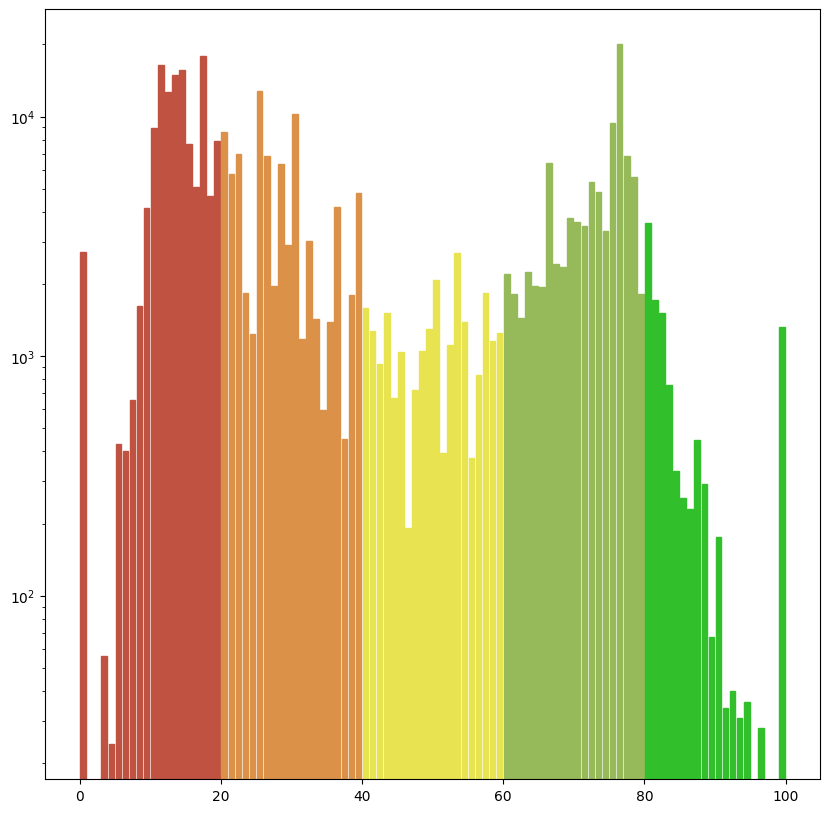

In [176]:
N, bins, patches =  plt.hist(data=df, x="review_score", bins=100, rwidth=0.8, weights="num_total_reactions", log=True)
#sns.histplot(data=df, x="review_score", weights="num_total_reactions", stat="percent", bins=25, kde=True, discrete=True)

#Define the colors for your pathces (you can write them in any format):
colors    = ['#bf5241', '#db9248', '#e8e351', '#96ba59', '#31bf2c']
#Define the ranges of your patches:
divisions = [range(0, 20), range(20, 40), range(40, 60), range(60, 80), range(80, 100)]
#If you want to label the regions/divisions:
labels = ["Red", "Orange", "Yellow", "Green", "Birhg Green"]

#for each division color the parches according to the specified colors:
for d in divisions:
    patches[list(d)[0]].set_label(labels[divisions.index(d)])
    for i in d:
        patches[i].set_color(colors[divisions.index(d)])

### Violins of Ratings

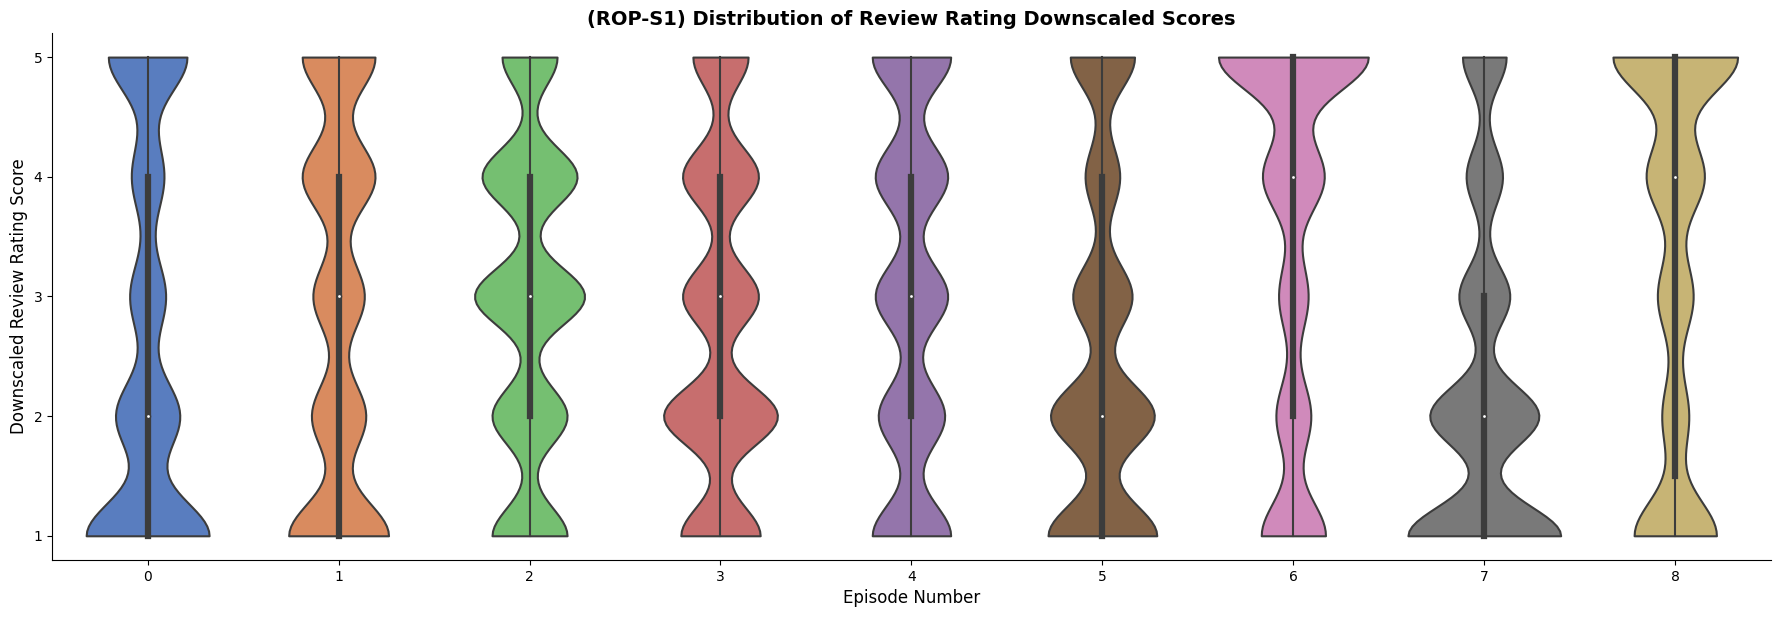

<Figure size 1000x1000 with 0 Axes>

In [214]:
def build_violin_of_episode_rating_scores(df: pd.DataFrame, show: str, season: int, x: str="episode_number", y: str="review_rating_5_scale"):
    # Build plot
    g = sns.catplot(data=df, x=x, y=y, kind="violin", height=6, aspect=3, cut=0, bw=.18, linewidth=1.5, palette="muted")
    
    # Handle y axis title
    if y == "review_rating":
        ylabel = "Original Review Rating Score"
        dtype = "Review Rating Original Scores"
    elif y == "review_rating_categorical":
        ylabel = "Review Rating Category"
        dtype = "Review Rating Categories"
    elif y == "review_rating_5_scale":
        ylabel = "Downscaled Review Rating Score"
        dtype = "Review Rating Downscaled Scores"
    plt.ylabel(ylabel, fontsize=12)
    
    # Handle y axis ticks
    min_y = df[y].min()
    max_y = df[y].max()
    plt.yticks(np.arange(min_y, max_y + 1, 1.0))
    
    # Handle x axis title
    plt.xlabel("Episode Number", fontsize=12)
    
    # Handle plot title according to data
    title = f"({show}-S{season}) Distribution of {dtype}"
    plt.title(title, fontweight="bold", fontsize=14)
    
    # Show and close
    plt.show()
    plt.clf()
    
build_violin_of_episode_rating_scores(df=df, show="ROP", season=1)

In [40]:
import collections
cat_freq = pd.DataFrame(sorted(dict(df.review_rating.value_counts()).items()), columns=["Review Rating", "Frequency"])

In [45]:
df.columns

Index(['review_rating', 'user_name', 'review_date', 'review_title',
       'review_text', 'num_helpful_reactions', 'num_total_reactions',
       'episode_number', 'season_number', 'review_score', 'full_review_text',
       'review_title_clean', 'review_text_clean', 'full_review_text_clean',
       'rating_category', 'review_sentiment'],
      dtype='object')

In [116]:
by_episode_ratings

,episode_number,avg_review_rating,median_review_rating,mode_review_rating,std_review_rating,sum_review_reactions,avg_review_sentiment,median_review_sentiment,mode_review_sentiment,std_review_sentiment,sum_reviews
0,0,4.754250,4.0,1,3.396029,283052,48.645701,57.14,0.00,36.017394,4529
1,1,5.252033,5.0,1,3.199728,8867,34.612605,37.98,0.00,22.370640,246
2,2,5.341463,6.0,6,2.672307,1771,48.540732,50.00,50.00,16.359595,82
3,3,5.051724,5.0,3,2.746840,5670,45.225702,47.95,0.00,27.156874,116
4,4,5.688525,6.0,10,3.030627,4011,40.925082,38.89,33.33,17.621777,61
5,5,4.653333,4.0,2,2.933927,6377,51.988933,53.57,100.00,20.816336,75
6,6,6.755906,8.0,10,3.240901,10479,40.407795,38.42,25.00,18.438829,127
7,7,4.018519,3.0,1,2.811638,2667,58.268889,63.12,100.00,24.971357,54
8,8,6.272109,7.0,10,3.461249,8208,39.054384,34.55,20.00,18.308086,147


In [94]:
by_episode_ratings.review_rating.mean()

5.3097623618503755

In [89]:
df.review_rating.mean()

4.881552326650726

In [97]:
by_episode_ratings

,review_rating
episode_number,
0,4.754250
1,5.252033
2,5.341463
3,5.051724
4,5.688525
5,4.653333
6,6.755906
7,4.018519
8,6.272109


I see the actual scores from the reviews are much lower than the rating without reviews. As it turns out, they calculate the average rating using an arcane algorithm based on weighted averages.

https://www.imdb.com/title/tt7631058/ratings/?ref_=tt_ov_rt

https://help.imdb.com/article/imdb/track-movies-tv/weighted-average-ratings/GWT2DSBYVT2F25SK?ref_=cons_tt_rt_wtavg#

### Google Trends Plots

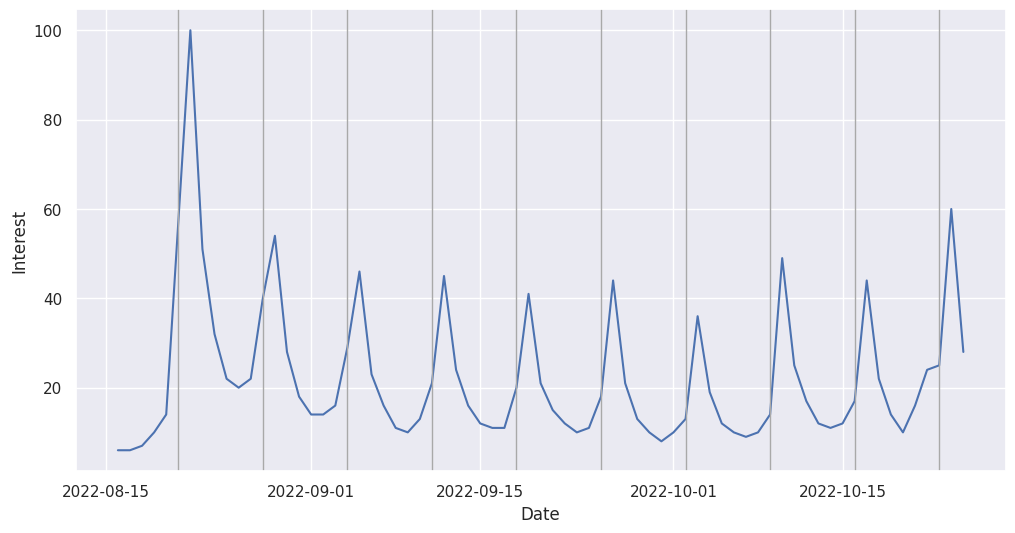

In [251]:
hotd_trends = pd.read_csv("hotd_google_trends.csv", header=1)

# Clean data
hotd_trends.rename({"Day": "Date", "house of the dragon: (Worldwide)": "Interest"}, axis=1, inplace=True)
hotd_trends["Date"] = hotd_trends["Date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

# Filtering
hotd_trends = hotd_trends[hotd_trends["Date"] > datetime.strptime('2022-08-15', "%Y-%m-%d")]

# Establishing lines
start_date = datetime.strptime('2022-08-21', "%Y-%m-%d")
episode_dates = [start_date]

for x in range(1,10):
    episode_dates.append(start_date + timedelta(days=7*x))
    
sns.lineplot(hotd_trends, x = hotd_trends["Date"], y = hotd_trends["Interest"])
for x in episode_dates:
    plt.axvline(pd.to_datetime(x), color='darkgrey', linestyle='-', lw=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


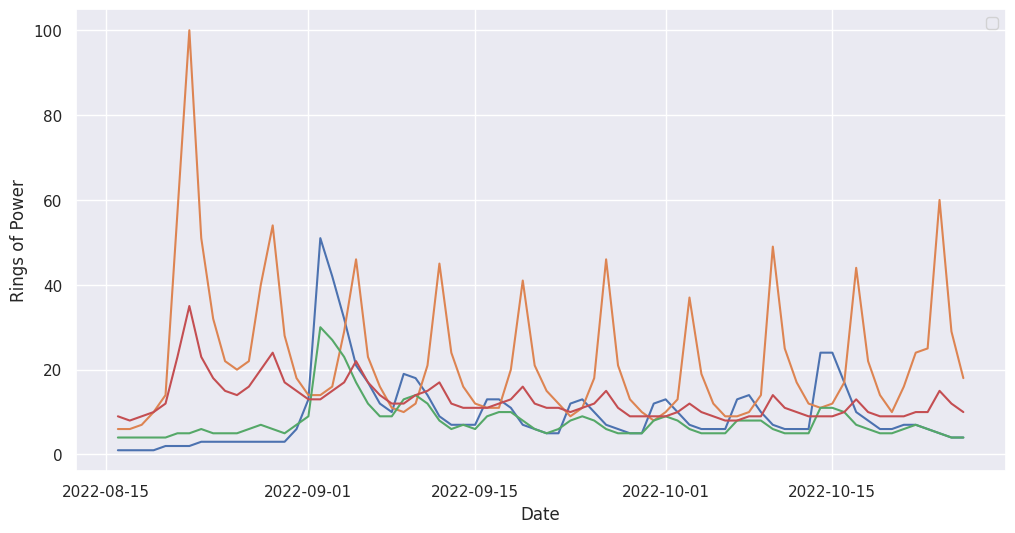

In [277]:
trends = pd.read_csv("comparative_trends.csv", header=1)

# Clean the data
trends.rename(
    {
        "Day": "Date",
        "rings of power: (Worldwide)": "Rings of Power",
        "house of the dragon: (Worldwide)": "House of The Dragon",
        "the lord of the rings: (Worldwide)": "The Lord of the Rings",
        "game of thrones: (Worldwide)": "Game of Thrones"
        }, axis=1, inplace=True)

trends["Date"] = trends["Date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

# Filtering
start_date = datetime.strptime('2022-08-15', "%Y-%m-%d")
trends = trends[trends["Date"] > start_date]

fig, ax = plt.subplots()

ax = sns.lineplot(trends, x = trends["Date"], y = trends["Rings of Power"])
ax = sns.lineplot(trends, x = trends["Date"], y = trends["House of The Dragon"])
ax = sns.lineplot(trends, x = trends["Date"], y = trends["The Lord of the Rings"])
ax = sns.lineplot(trends, x = trends["Date"], y = trends["Game of Thrones"])
ax.legend(loc='upper right')

/tmp/ipykernel_10545/2554796447.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


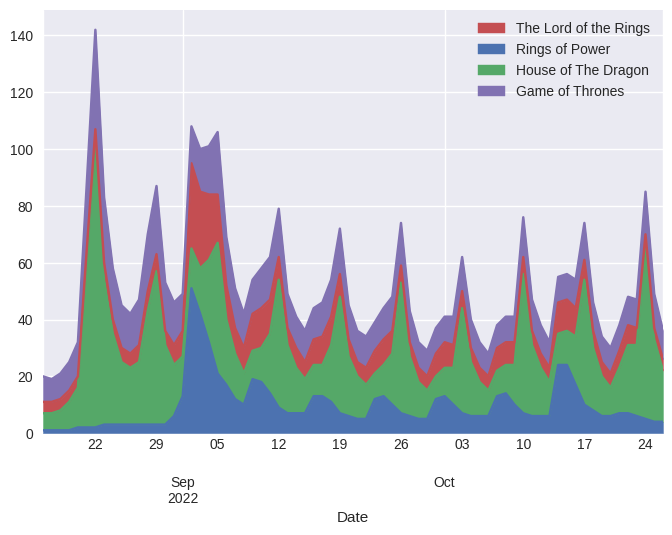

In [280]:
plt.style.use('seaborn')
trends.set_index("Date").plot.area()

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=True))
ax.legend(handles, labels)
plt.show()

In [266]:
trends.head()

,Date,Rings of Power,House of The Dragon,The Lord of the Rings,Game of Thrones
0,2022-07-30,1,2,3,8
1,2022-07-31,1,2,4,8
2,2022-08-01,1,3,3,7
3,2022-08-02,1,3,3,6
4,2022-08-03,1,2,3,7


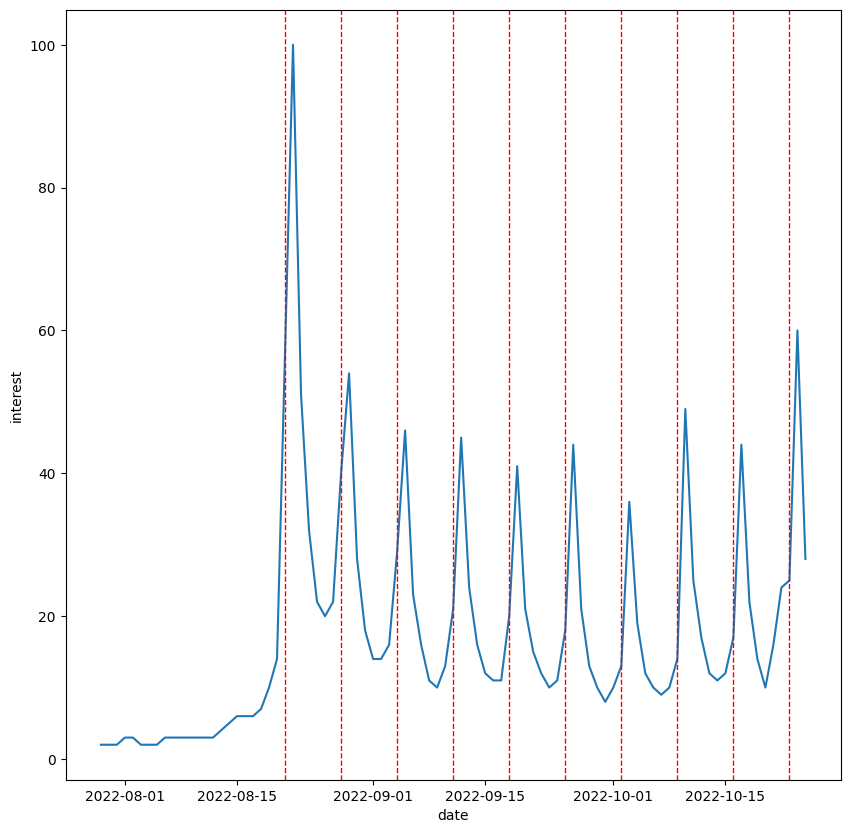

In [224]:
rop_trends = pd.read_csv("rop_google_trends.csv", header=1)

# Clean the data
rop_trends.rename({"Day": "date", "rings of power: (Worldwide)": "interest"}, axis=1, inplace=True)
rop_trends["date"] = rop_trends["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))

start_date = datetime.strptime('2022-08-21', "%Y-%m-%d")
episode_dates = [start_date]

for x in range(1,10):
    episode_dates.append(start_date + timedelta(days=7*x))
    
sns.lineplot(hotd_trends, x = hotd_trends.date, y = hotd_trends.interest)
for x in episode_dates:
    plt.axvline(pd.to_datetime(x), color='r', linestyle='--', lw=1)

In [225]:
start_date = datetime.strptime('2022-09-01', "%Y-%m-%d")
episode_dates = [start_date]

for x in range(1,8):
    episode_dates.append(start_date + timedelta(days=7*x))
    
sns.lineplot(trends, x = trends.date, y = trends.interest)
plt.figsize=(14,42)
for x in episode_dates:
    plt.axvline(pd.to_datetime(x), color='r', linestyle='--', lw=1)

NameError: name 'trends' is not defined

[datetime.datetime(2022, 9, 1, 0, 0),
 datetime.datetime(2022, 9, 8, 0, 0),
 datetime.datetime(2022, 9, 15, 0, 0),
 datetime.datetime(2022, 9, 22, 0, 0),
 datetime.datetime(2022, 9, 29, 0, 0),
 datetime.datetime(2022, 10, 6, 0, 0),
 datetime.datetime(2022, 10, 13, 0, 0),
 datetime.datetime(2022, 10, 20, 0, 0)]

In [176]:
trends.iloc['2022-10-23']

TypeError: Cannot index by location index with a non-integer key

### Common User Ratings

In [227]:
rop_df = pd.read_csv("../src/data/rop.csv")
rop_df["show"] = "rop"
hotd_df = pd.read_csv("../src/data/hotd_s1.csv")
hotd_df["show"] = "hotd"

In [205]:
rop_df.user_name.nunique()

5426

In [206]:
hotd_df.user_name.nunique()

2762

In [212]:
(rop_df.user_name.nunique() + hotd_df.user_name.nunique()) -  len(set(hotd_df.user_name) - set(rop_df.user_name))

5476

In [211]:
(rop_df.user_name.nunique() + hotd_df.user_name.nunique()) - len(set(rop_df.user_name) - set(hotd_df.user_name))

2812

In [214]:
len(set(rop_df.user_name).intersection(set(hotd_df.user_name)))

50

In [216]:
len(set(hotd_df.user_name).intersection(set(rop_df.user_name)))

50

In [208]:
set(hotd_df) - set(rop_df.user_name)

{'episode_number',
 'num_helpful_reactions',
 'num_total_reactions',
 'review_date',
 'review_rating',
 'review_text',
 'review_title',
 'user_name'}

In [217]:
rop_df.shape[0]

5501

In [218]:
rop_df.user_name.value_counts()

carlostbj11        4
RubyMouse9         4
provoko-6784713    4
dmjrnbsn-307622    3
luisq0516          3
                  ..
runforhim41217     1
Blade754503        1
adamfreihaut24     1
ojczeo7            1
riccardoeste3      1
Name: user_name, Length: 5426, dtype: int64

In [219]:
rop_df[rop_df.user_name == 'carlostbj11']

,review_rating,user_name,review_date,review_title,review_text,num_helpful_reactions,num_total_reactions,episode_number,season_number
49,4.0,carlostbj11,11 September 2022,Still need to improve,This episode seemed more monotonous to me than...,5.0,10.0,2,1
179,3.0,carlostbj11,11 September 2022,"Well, nothing to see here...I tried. And I'm ...",This episode managed to be more uninteresting ...,1.0,2.0,3,1
725,5.0,carlostbj11,11 September 2022,I expected more,"I was really looking forward to this series, t...",6.0,11.0,1,1
4160,4.0,carlostbj11,11 September 2022,"I expected too much, and I'm sad.",I stopped watching in episode 3. Very weak dia...,0.0,1.0,0,0


In [228]:
rop_hotd_df = pd.concat([rop_df, hotd_df])

In [229]:
common_users = set(hotd_df.user_name).intersection(set(rop_df.user_name))

In [230]:
rop_hotd_df = rop_hotd_df[rop_hotd_df.user_name.isin(common_users)]

In [231]:
rop_hotd_df.review_rating.mean()

6.616161616161616

In [233]:
rop_hotd_df[rop_hotd_df.show == "rop"].review_rating.mean()

6.02

In [234]:
rop_hotd_df[rop_hotd_df.show == "hotd"].review_rating.mean()

7.224489795918367

In [235]:
rop_df.review_rating.mean()

4.881552326650726

In [237]:
rop_df.groupby("episode_number").agg(avg_rating=("review_rating", "mean"))

,avg_rating
episode_number,
0,4.754250
1,5.252033
2,5.341463
3,5.051724
4,5.688525
5,4.653333
6,6.755906
7,4.018519
8,6.272109


In [238]:
hotd_df.groupby("episode_number").agg(avg_rating=("review_rating", "mean"))

,avg_rating
episode_number,
0,6.156569
1,8.190349
2,7.129252
3,7.684848
4,7.277778
5,7.375000
6,5.194631
7,7.455285
8,8.867257


In [239]:
len(hotd_df)

2814